## Model Selection and Evaluation

In [51]:
import os 
#Xgboost Classifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
 
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# XGBoost
from xgboost import XGBClassifier

# multilayer perceptron
from sklearn.neural_network import MLPClassifier

from sklearn import tree
from sklearn.neural_network import MLPClassifier

from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve

# model explanation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc


In [52]:

figure_path = os.path.join(os.path.pardir, 'reports','figures')

In [56]:
def model_classifier(model, X, y, cv):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """
    scores = []
    
    
    for train_index,test_index in cv.split(X,y):
        X_train,X_test = X.loc[train_index],X.loc[test_index]
        y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        y_pred_prob = model_obj.predict_proba(X_test)[:,1]
        # Score the model on the validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()    

    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print('--------------------------------------')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print('--------------------------------------')
    print(conf_matrix)
    
    print("\n ROC Curve")
    
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    if model == lr:
        val_model = "lr"
    if model == xgb:
        val_model = "xgb"
    if model == mlp:
        val_model = "mlp"
    plt.plot(fpr, tpr, label= val_model + ' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    my_fig = val_model + '.png'
    plt.savefig(my_fig)
    plt.show()

In [57]:
#defining our machine learning models
lr = LogisticRegression()
xgb = XGBClassifier()
mlp = MLPClassifier()

models = [lr,xgb,mlp]

kf = KFold(n_splits = 10, shuffle = True, random_state = 4)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)

Accuracy scores of the model: 0.93

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2682
           1       0.98      0.87      0.92      2703

    accuracy                           0.93      5385
   macro avg       0.93      0.93      0.93      5385
weighted avg       0.93      0.93      0.93      5385


 Confusion Matrix of the model
--------------------------------------
[[2634   48]
 [ 345 2358]]

 ROC Curve


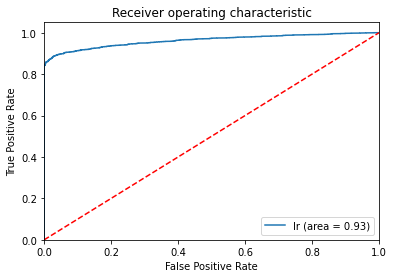

Accuracy scores of the model: 0.95

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2682
           1       0.97      0.92      0.95      2703

    accuracy                           0.95      5385
   macro avg       0.95      0.95      0.95      5385
weighted avg       0.95      0.95      0.95      5385


 Confusion Matrix of the model
--------------------------------------
[[2616   66]
 [ 216 2487]]

 ROC Curve


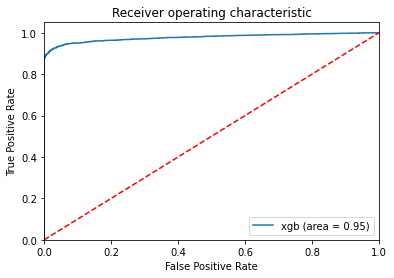

Accuracy scores of the model: 0.93

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2682
           1       0.97      0.90      0.93      2703

    accuracy                           0.93      5385
   macro avg       0.94      0.93      0.93      5385
weighted avg       0.94      0.93      0.93      5385


 Confusion Matrix of the model
--------------------------------------
[[2595   87]
 [ 267 2436]]

 ROC Curve


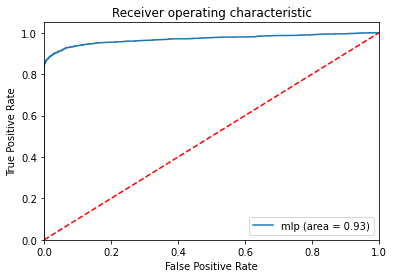

In [58]:
for i in models:
    model_classifier(i, smote_train, smote_target, kf)